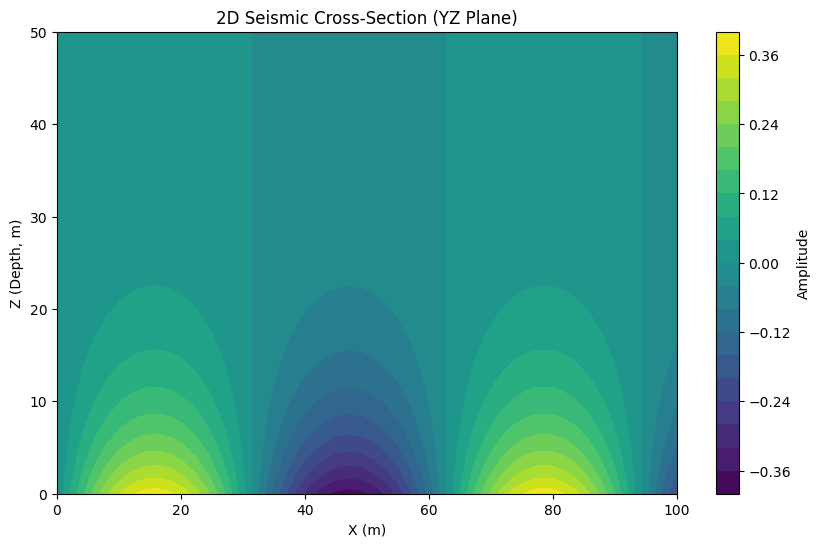

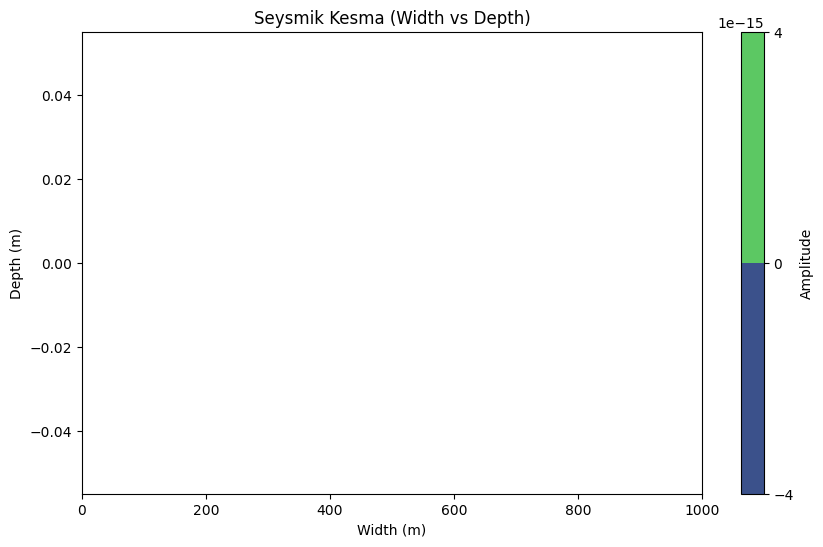

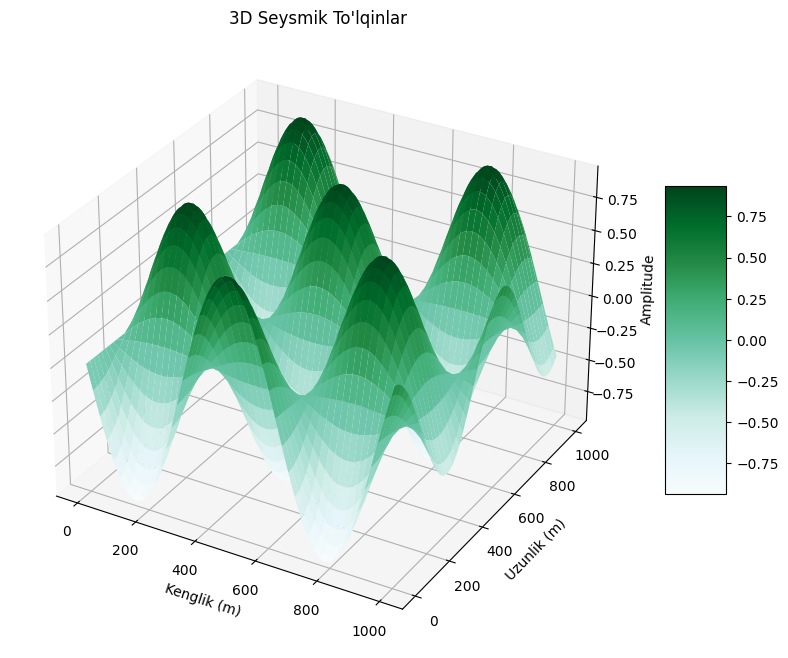

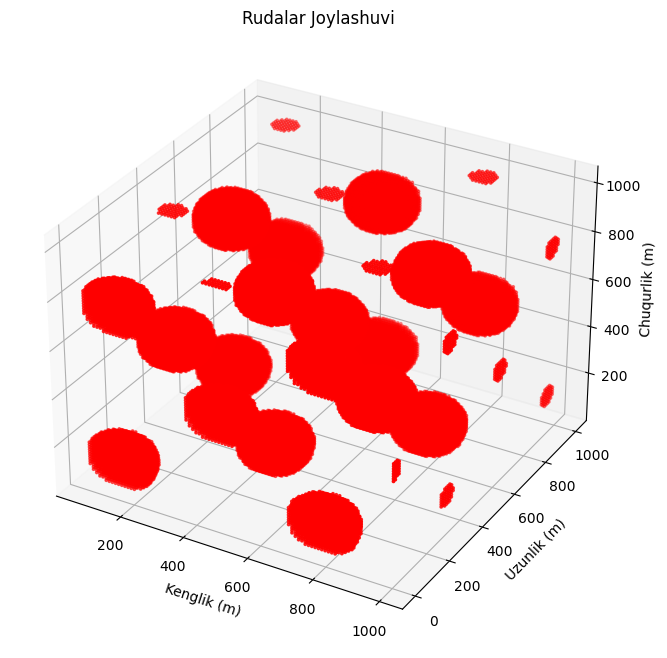

In [10]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import matplotlib.pyplot as plt
#import plotly.graph_objects as go <-- kutubxona topilmadi
from mpl_toolkits.mplot3d import Axes3D
# 1. Sun'iy seysmik ma'lumotlar yaratish
nx, ny, nz = 50, 50, 30  # O'lchamlar (x, y, z)
x = np.linspace(0, 100, nx)
y = np.linspace(0, 100, ny)
z = np.linspace(0, 50, nz)

X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
seismic_data = np.sin(0.1 * X) * np.cos(0.1 * Y) * np.exp(-0.1 * Z)

# 2. 2D grafiklar (kesmalar)
plt.figure(figsize=(10, 6))
plt.contourf(x, z, seismic_data[:, ny//2, :].T, levels=20, cmap="viridis")
plt.colorbar(label="Amplitude")
plt.title("2D Seismic Cross-Section (YZ Plane)")
plt.xlabel("X (m)")
plt.ylabel("Z (Depth, m)")
plt.show()
# 1. Sun'iy seysmik ma'lumotlarni yaratish (agar real ma'lumotlar bo'lsa, bu qadamni o'zgartirish mumkin)
# Chuqurlik, kenglik va uzunlik bo'yicha tasodifiy seysmik to'lqinlar

depth = np.linspace(0, 1000, 100)  # Chuqurlik
width = np.linspace(0, 1000, 100)  # Kenglik
length = np.linspace(0, 1000, 100)  # Uzunlik

X, Y, Z = np.meshgrid(width, length, depth)

# Seysmik to'lqinlarning amplitudasi
amplitude = np.sin(X/100) * np.cos(Y/100) * np.sin(Z/100)

# 2. 2D seysmik kesma yaratish
# Biz 2D grafikka seysmik to'lqinlarning kenglik va chuqurlik bo'yicha kesmasini ko'rsatamiz
plt.figure(figsize=(10, 6))
plt.contourf(X[:,:,0], Z[:,:,0], amplitude[:,:,0], levels=50, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Width (m)')
plt.ylabel('Depth (m)')
plt.title('Seysmik Kesma (Width vs Depth)')
plt.show()

# 3. 3D seysmik tasvir yaratish
# 3D grafikda seysmik to'lqinlarning chuqurlik bo'yicha tarqalishini ko'rsatish
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sirt grafik yaratish
surf = ax.plot_surface(X[:, :, 50], Y[:, :, 50], amplitude[:, :, 50], cmap='BuGn')

# Rangli boshqaruv panelini qo'shish
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_title('3D Seysmik To\'lqinlar')
ax.set_xlabel('Kenglik (m)')
ax.set_ylabel('Uzunlik (m)')
ax.set_zlabel('Amplitude')

plt.show()

# 4. Rudalarni aniqlash (tasodifiy ko'rsatilgan joylashuv)
# Yerosti rudalarini aniqlash uchun, ma'lum bir amplituda chegarasida rudalarni belgilash

# Rudalar joylashuvi (tasodifiy ravishda tanlangan amplituda oralig'i)
rudalar = amplitude > 0.5

# Rudalarni 3D vizualizatsiya qilish
fig_rudalar = plt.figure(figsize=(10, 8))
ax_rudalar = fig_rudalar.add_subplot(111, projection='3d')

# Rudalarni ko'rsatish
ax_rudalar.scatter(X[rudalar], Y[rudalar], Z[rudalar], c='r', marker='o', s=3, label="Rudalar")

ax_rudalar.set_title('Rudalar Joylashuvi')
ax_rudalar.set_xlabel('Kenglik (m)')
ax_rudalar.set_ylabel('Uzunlik (m)')
ax_rudalar.set_zlabel('Chuqurlik (m)')

plt.show()
